<a href="https://colab.research.google.com/github/krrish9669/machine-learning-new/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

# Download MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Features and labels
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(int)

print(X.shape)  # (70000, 784)
print(y.shape)  # (70000,)



(70000, 784)
(70000,)


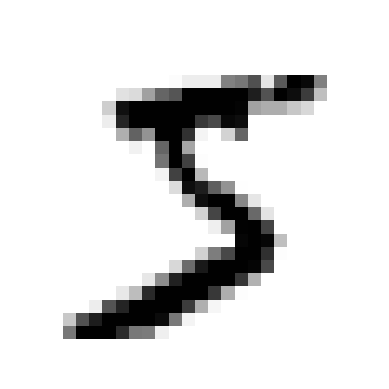

In [2]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary",interpolation="nearest")
plt.axis("off")
plt.show()

In [3]:
y[0]


np.int64(5)

In [4]:
"the data set is already split into training and testing 0-60000 and 60001-70000"
X_train,X_test ,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]
"now we will shuffel"
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [5]:
"lets make a 5 detector to make things ez in first"
y_train_5=(y_train==5)
y_test_5=(y_test==5)
#true for all 5 false for rest
"now we will create a sgd classifier this is good for large data set and goes throughdatat 1 at a time"


'now we will create a sgd classifier this is good for large data set and goes throughdatat 1 at a time'

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sgd_clf=make_pipeline(StandardScaler(),SGDClassifier(random_state=42,max_iter=2000,tol=1e-3))
sgd_clf.fit(X_train,y_train_5)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(max_iter=2000, random_state=42))])

In [7]:
"now we can use this to predict the img"
some_digit = X[2]
sgd_clf.predict([some_digit])




array([False])

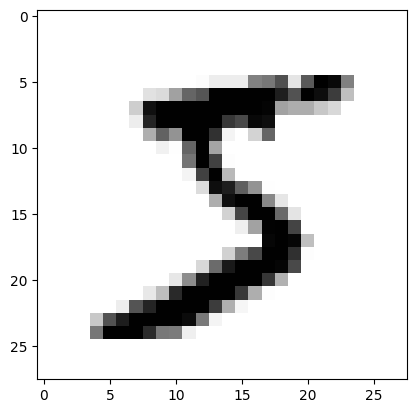

In [8]:
plt.imshow(X[0].reshape(28,28), cmap="binary",interpolation="nearest")
#our prediction is correct

In [9]:
#mesuring the accuracy with cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.96765, 0.9693 , 0.96995])

In [10]:
#95+% accuray doesnt mean its good cuz even if u say false to all the value the accuray will be 90% cuz 5 comes only 10% time in whole sample set
"example this is a very dumb classifier below chceck its accuray"
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)



In [11]:
"90+% told u its just 10% hence 90% times it will come correct"
never5 = Never5Classifier()
cross_val_score(never5,X_train,y_train_5,cv=3,scoring="accuracy")


array([0.9078 , 0.9122 , 0.90895])

In [12]:
#confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
confusion_matrix(y_train_5,y_train_pred,)

array([[53957,   622],
       [ 1240,  4181]])

In [13]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)
#when it claims a 5 its correct 84% of time

0.8704976056631272

In [14]:
recall_score(y_train_5,y_train_pred)
#detects only 68% of 5

0.7712599151448072

In [15]:
#f1 is harmonic mean of precision n recall
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.8178794992175273

In [16]:
#desicionfunction for thresholds
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([-750.98868696])

In [17]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [18]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [19]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [20]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

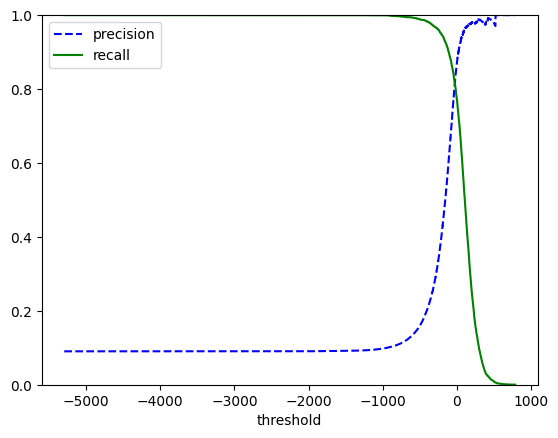

In [21]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="recall")
    plt.xlabel("threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])


plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

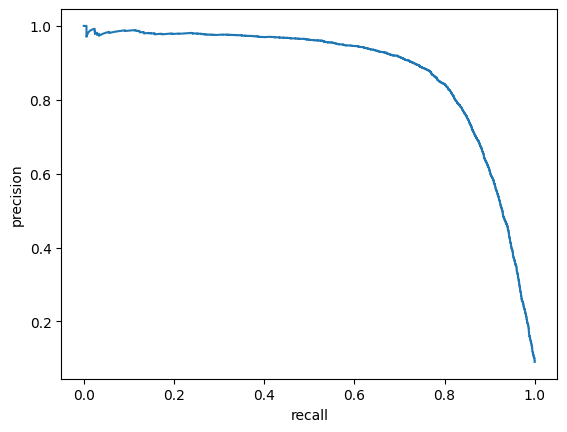

In [22]:
plt.plot(recalls[:-1],precisions[:-1])
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [23]:
y_train_pred_90=(y_scores>0.8212)
precision_score(y_train_5,y_train_pred_90)

0.8723893065998329

In [24]:
recall_score(y_train_5,y_train_pred_90)


0.7705220439033389

In [25]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

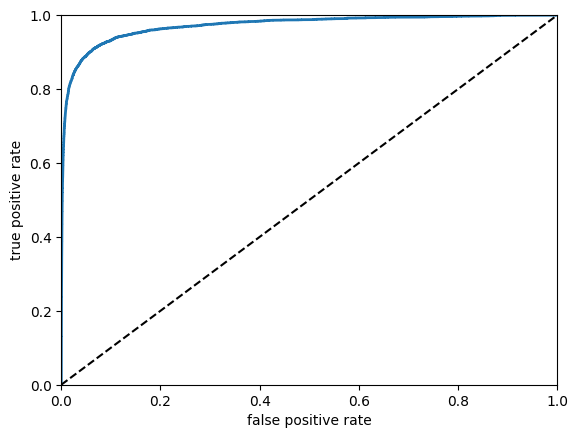

In [26]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")

plot_roc_curve(fpr,tpr)
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

np.float64(0.9718736188213933)

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [29]:
y_score_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_score_forest)


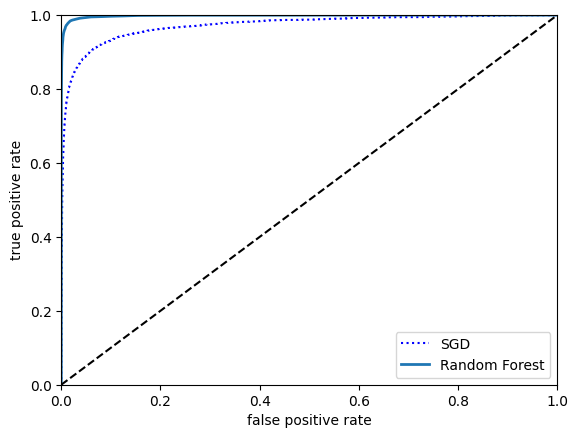

In [30]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [31]:
roc_auc_score(y_train_5,y_score_forest)

np.float64(0.9984246116419254)

In [32]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([4])

In [33]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score

array([[-1003.93505069, -1850.53371713,  -383.84400714,  -100.2583903 ,
            4.20884096,  -724.99199727, -1164.6307903 ,  -252.00859023,
         -613.73427059,  -365.42790679]])

In [34]:
np.argmax(some_digit_score)

np.int64(4)

In [35]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([4])

In [36]:
len(ovo_clf.estimators_)

45

In [37]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


array([4])

In [38]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.  , 0.91, 0.01, 0.  , 0.05, 0.02, 0.01]])

In [39]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.90085, 0.90195, 0.8995 ])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90085, 0.90195, 0.8995 ])

In [41]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5592,    0,   17,    8,    8,   40,   35,    5,  217,    1],
       [   1, 6421,   42,   22,    3,   39,    4,    7,  195,    8],
       [  29,   25, 5251,   94,   70,   26,   71,   36,  346,   10],
       [  27,   23,  116, 5239,    2,  201,   26,   41,  386,   70],
       [  10,   15,   43,   13, 5251,   10,   32,   19,  288,  161],
       [  30,   17,   25,  167,   56, 4461,   77,   18,  507,   63],
       [  31,   18,   48,    2,   43,   89, 5552,    6,  128,    1],
       [  23,   13,   54,   25,   49,    9,    4, 5700,  170,  218],
       [  18,   61,   45,  103,    2,  123,   29,    7, 5418,   45],
       [  21,   22,   29,   58,  127,   41,    1,  174,  315, 5161]])

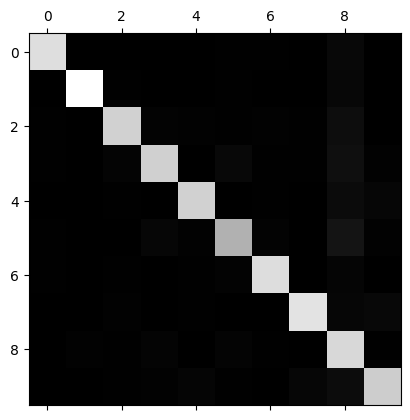

In [42]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

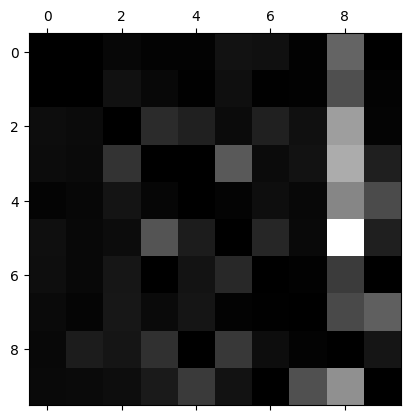

In [43]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [44]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")
    plt.show()



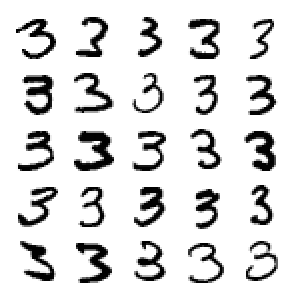

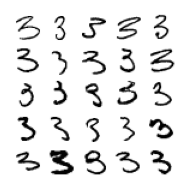

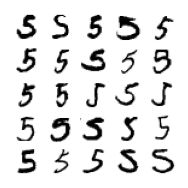

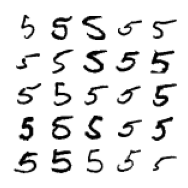

In [45]:
cl_a, cl_b = 3, 5





X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5,)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [46]:
  from sklearn.neighbors import KNeighborsClassifier
  y_train_large=(y_train>=7)
  y_train_odd=(y_train%2==1)
  y_multilabel=np.c_[y_train_large,y_train_odd]
  knn_clf=KNeighborsClassifier()
  knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [47]:
knn_clf.predict([some_digit])

array([[False, False]])

In [48]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9769472812723244

In [49]:
#image cleaning
import numpy as np
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


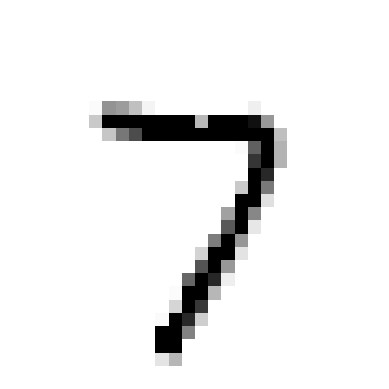

In [51]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[0]])
plot_digits(clean_digit)